In [3]:
import numpy as np
from scipy import io
import glob   
import os, sys
sys.path.append("../src/")

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


In [4]:
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)

In [5]:
lw1=4
aph=.7
sc = 20.

In [6]:
import dp_map
dpmap = dp_map.drake_passage_map()
m = dpmap.m

In [7]:
topo = np.load("../topo/topo_dp.npz")
lont,latt,zt = topo['lon'],topo['lat'],topo['topo']
dec = 2
lont = lont[::dec]
latt = latt[::dec]
zt = zt[::dec,::dec]
lonti,latti = np.meshgrid(lont,latt)
xgt,ygt = m(lonti,latti)

In [8]:
fni = 'tracks/*dat'
files=glob.glob(fni)  

/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


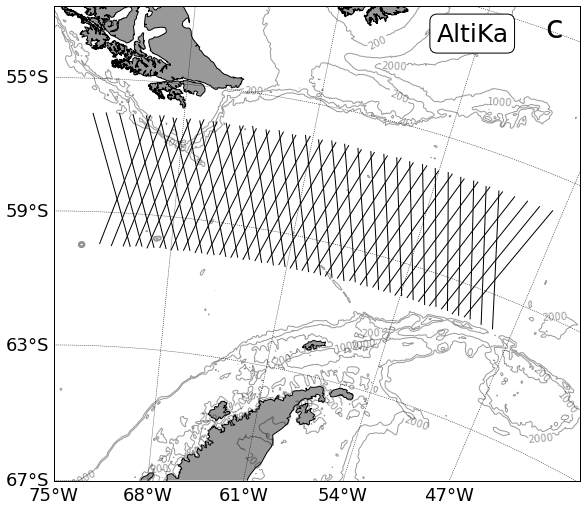

In [9]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

cs = m.contour(xgt,ygt,-zt,np.array([200,1000,2000]),colors='k',alpha=.4)
plt.clabel(cs,inline=1,fontsize=10,fmt='%i')

for file in files:
    aux = np.loadtxt(file)
    lonaux,lataux = m(aux[:,0],aux[:,1])
    m.plot(lonaux,lataux,color='k')

m.fillcontinents(color='.60',lake_color='none')
dpmap.draw_par_mer()
m.drawcoastlines()

dpmap.set_label(pos=(1650212,1485371))
dpmap.set_title(pos=(1400212,1495371))
plt.savefig('figs/tracks_altika',bbox_inches='tight')

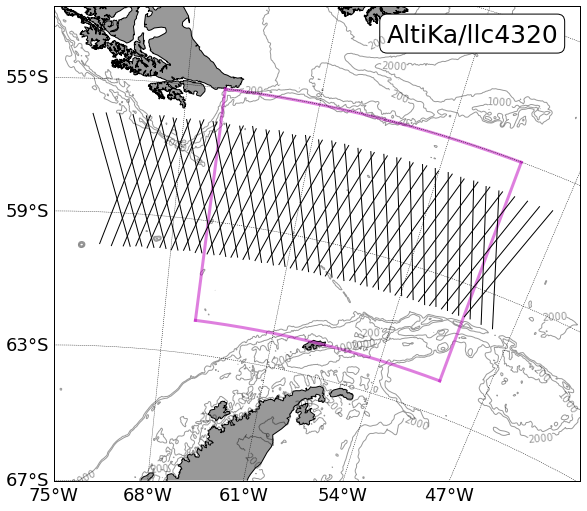

In [18]:
dpmap = dp_map.drake_passage_map(fig_title="AltiKa/llc4320",fig_label=" ")
m = dpmap.m

model_pos = np.load('lon_lat_model.npz')
lon,lat = model_pos['lon'], model_pos['lat']

fig = plt.figure(facecolor='w', figsize=(12.,8.5))

cs = m.contour(xgt,ygt,-zt,np.array([200,1000,2000]),colors='k',alpha=.4)
plt.clabel(cs,inline=1,fontsize=10,fmt='%i')

m.plot(lon[0,:],lat[0,:],'m',linewidth=3.,alpha=.5)
m.plot(lon[-1,:],lat[-1,:],'m',linewidth=3.,alpha=.5)
m.plot(lon[:,-1],lat[:,-1],'m',linewidth=3.,alpha=.5)
m.plot(lon[:,0],lat[:,0],'m',linewidth=3.,alpha=.5)

for file in files:
    aux = np.loadtxt(file)
    lonaux,lataux = m(aux[:,0],aux[:,1])
    m.plot(lonaux,lataux,color='k')

m.fillcontinents(color='.60',lake_color='none')
dpmap.draw_par_mer()
m.drawcoastlines()

dpmap.set_label(pos=(1650212,1485371))
dpmap.set_title(pos=(1400212,1495371))
plt.savefig('figs/tracks_altika_model_domain',bbox_inches='tight')
plt.savefig('figs/tracks_altika_model_domain.eps',bbox_inches='tight')